# 1. 강의영상 

{{<video https://youtu.be/playlist?list=PLQqh36zP38-yf6Ht2bBpj-mf50aPboSsu&si=6dYX9WfoPmbbbGsG >}}

# 2. Imports 

In [5]:
import numpy as np
import pandas as pd
import sklearn.linear_model
import matplotlib.pyplot as plt

# 3. Data 

In [39]:
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:100,3].to_numpy()
temp.sort()
ice_sales = 10 + temp * 0.5 + np.random.randn(100)
ice_sales[0] = 200
df_train = pd.DataFrame({'temp':temp,'ice_sales':ice_sales})
df_train

,temp,ice_sales
0,-4.1,200.000000
1,-3.7,9.234175
2,-3.0,9.642778
3,-1.3,9.657894
4,-0.5,9.987787
...,...,...
95,12.4,17.508688
96,13.4,17.105376
97,14.7,17.164930
98,15.0,18.555388


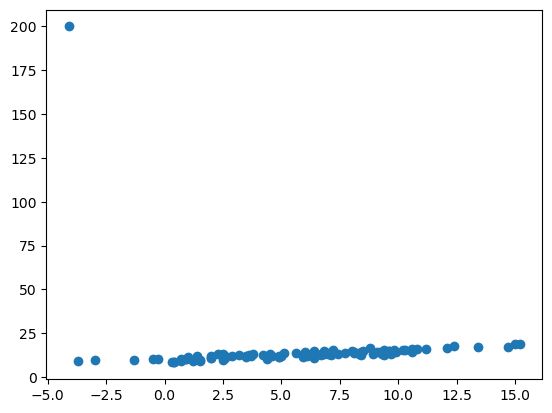

In [40]:
plt.plot(df_train.temp,df_train.ice_sales,'o')

- 상상: 온도가 -4.1인 지점에서 "썰매축제"가 열렸다고 가정하자. 그래서 사람이 갑자기 많이 왔음. 그래서 아이스크림이 많이 팔렸음. 

# 4. 분석 

`-` 선형회귀로 적합 

In [41]:
# step1 
X,y = df_train[['temp']], df_train['ice_sales']
# step2 
predictr = sklearn.linear_model.LinearRegression()
# step3 
predictr.fit(X,y)
# step4 
df_train['ice_sales_hat'] = predictr.predict(X)

`-` 시각화 

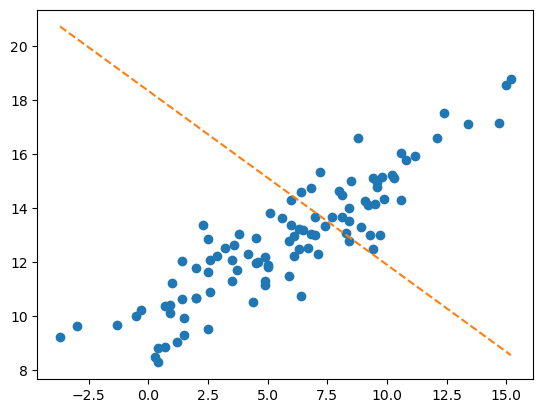

In [43]:
# plt.plot(df_train.temp,df_train.ice_sales,'o')
# plt.plot(df_train.temp,df_train.ice_sales_hat,'--')
plt.plot(df_train.temp[1:],df_train.ice_sales[1:],'o')
plt.plot(df_train.temp[1:],df_train.ice_sales_hat[1:],'--')

`-` 새로운 unseen data를 가정, 데이터는 온도가 12.5\~18 에 걸쳐있다고 가정한다. 

In [44]:
df_train

,temp,ice_sales,ice_sales_hat
0,-4.1,200.000000,20.989373
1,-3.7,9.234175,20.731457
2,-3.0,9.642778,20.280103
3,-1.3,9.657894,19.183959
4,-0.5,9.987787,18.668126
...,...,...,...
95,12.4,17.508688,10.350324
96,13.4,17.105376,9.705533
97,14.7,17.164930,8.867305
98,15.0,18.555388,8.673867


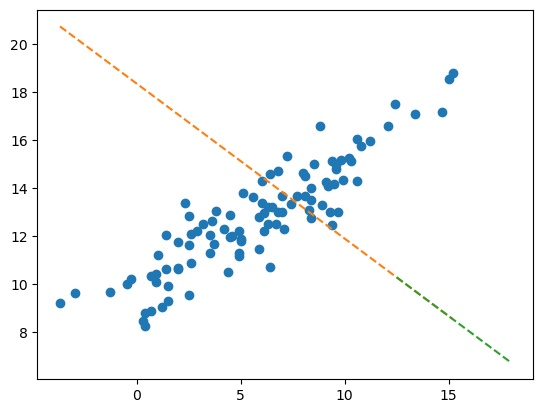

In [53]:
XX = df_test = pd.DataFrame({'temp':np.linspace(12.5,18,50)})
df_test['ice_sales_hat'] = predictr.predict(XX)
plt.plot(df_train.temp[1:],df_train.ice_sales[1:],'o')
plt.plot(df_train.temp[1:],df_train.ice_sales_hat[1:],'--')
plt.plot(df_test.temp,df_test.ice_sales_hat,'--')

- 온도가 올라갈수록 아이스크림 판매량은 줄어든다는 해석 (더 온도가 올라간다면 판매량이 음수가 나올 수도 있겠음 )
- 저 정도의 아웃라이어는 모형에서 제외하는게 타당하지 않나? (하지만 저러한 아웃라이어가 데이터의 가치가 있을 수도 있음. 그런데 또 데이터의 가치가 있는지 얺는지는 어떻게 판단하지?)

:::{.callout-important}
### 2023-10-24 추가해설
train,test의 score로 오버피팅을 정의하는 교재를 제가 싫어하는 이유 

- 위 그림의 예시는 train score가 test score 보다 좋을 수 있음. 그런데 이건 딱히 오버핏이라 보기 어려움.
:::

# 5. Discussion 

`-` 딱히 정답이 없음.. 